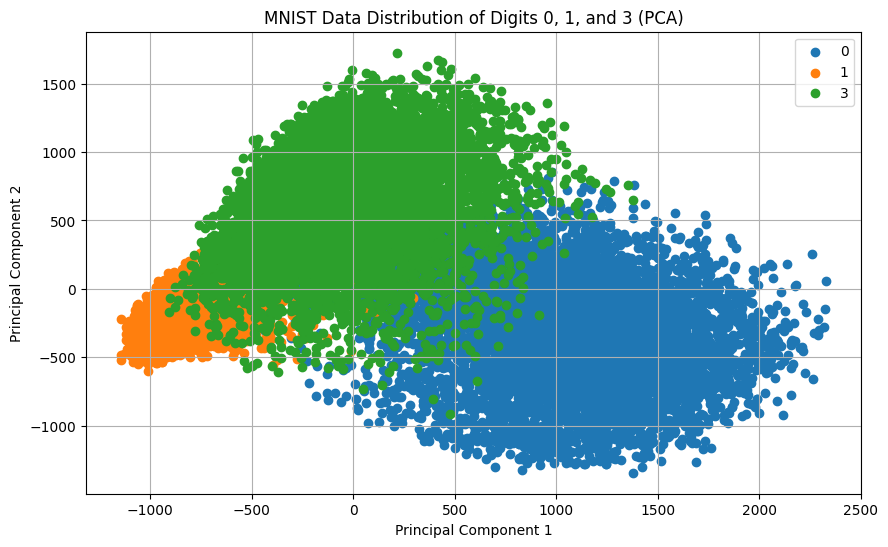

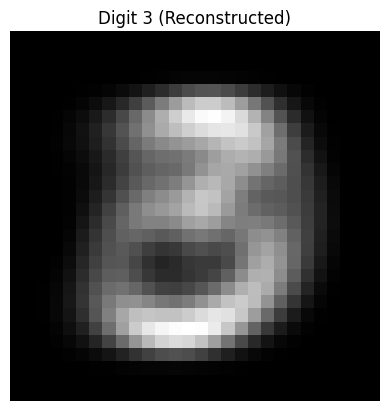

In [4]:
# Import useful libraries
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Convert labels to integers
y = y.astype(int)

# Filter out digits '0', '1', and '3'
digits_to_keep = [0, 1, 3]
X_filtered = X[np.isin(y, digits_to_keep)]
y_filtered = y[np.isin(y, digits_to_keep)]

# Conduct PCA to reduce the dimensionality of X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered)

# Visualize the data distribution of digits '0', '1' and '3' in a 2D scatter plot
plt.figure(figsize=(10, 6))
for digit in digits_to_keep:
    plt.scatter(
        X_pca[y_filtered == digit, 0], X_pca[y_filtered == digit, 1], label=str(digit)
    )
plt.title("MNIST Data Distribution of Digits 0, 1, and 3 (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


index_digit_3 = np.where(y_filtered == 3)[0][0]

plt.show()

midpoint = (
    X_pca[y_filtered == 0].mean(axis=0) + X_pca[y_filtered == 1].mean(axis=0)
) / 2

vector_3 = X_pca[index_digit_3] - midpoint

new_point = midpoint + 0.5 * vector_3

reconstructed_image = pca.inverse_transform(new_point.reshape(1, -1))

# Plot the reconstructed image
plt.imshow(reconstructed_image.reshape(28, 28), cmap="gray")
plt.title("Digit 3 (Reconstructed)")
plt.axis("off")
plt.show()

Model 1 with 1 hidden layer and 64 hidden nodes achieves a training accuracy of 0.690 and a validation accuracy of 0.635.
Model 2 with 2 hidden layers and 32 hidden nodes achieves a training accuracy of 0.685 and a validation accuracy of 0.647.
Model 3 with 2 hidden layers and 64 hidden nodes achieves a training accuracy of 0.712 and a validation accuracy of 0.653.
From these performances, we can observe the following:

Model 3, which has the highest number of hidden nodes (64) and the best performance, achieves the highest validation accuracy. This suggests that increasing the complexity of the model by adding more hidden nodes can improve performance, up to a certain point.

Model 2, with two hidden layers, performs slightly better than Model 1 with only one hidden layer. This indicates that adding depth to the network can also contribute to better performance, although the improvement is not as significant as increasing the number of nodes.

 While Model 3 achieves the highest training accuracy, its validation accuracy is not significantly higher compared to Model 2, suggesting that Model 3 might be overfitting to the training data. Therefore, it's essential to strike a balance between model complexity and generalization performance to avoid overfitting.

In summary, Model 3 with 2 hidden layers and 64 hidden nodes seems to strike a good balance between model complexity and performance, achieving the highest validation accuracy among the three models. However, further tuning and experimentation may be necessary to optimize the model's performance further.

My idea is to find the midpoint between the representations of '0' and '1' and
then find the vector from the midpoint towards the representation of '3'. I
would then interpolate a new point towards '3' from the midpoint and reconstruct
an image from the interpolated point abd then transform the interpolated point
back to the original space.